## <b> Лабораторная работа 1 </b> <br>
## Знакомство с KAN и B-сплайны<br>
#### Зиберов Александр ИНС-м-о-25-1 <br>

#### <b> Цель работы: </b> Познакомиться с нейронными сетями KAN, изучить теоретические основы и математические принципы построения B-сплайнов, а также освоить методы их применения для функциональной аппроксимации.

<b>Сети Колмогорова–Арнольда (KAN)</b> – это новый тип нейронных сетей, который предлагает альтернативу традиционным многослойным перцептронам (MLP). Основное отличие заключается в том, что вместо стандартных линейных весов и фиксированных функций активации KAN используют обучаемые одномерные функции, расположенные на ребрах сети.

<b>MLP (Multilayer Perceptron)</b> – это классическая архитектура нейронной сети, часто называемая «полносвязной сетью» (Fully Connected Network). Каждый нейрон одного слоя соединен со всеми нейронами следующего слоя. Практически все глубокие сети либо являются MLP, либо включают их в свою архитектуру.

### <b> Теорема Колмогорова–Арнольда (о представлении функций) </b> <br>
Любая непрерывная многомерная функция
$$
f\left(x_1,x_2,\ldots,x_n\right)=\sum_{q=1}^{2n+1}\mathrm{\Phi}_q\left(\sum_{p=1}^{n}\psi_{pq}\left(x_p\right)\right)
$$

 может быть представлена как суперпозиция (комбинация) непрерывных одномерных функций.


### <b> Принцип работы KAN: </b>
1. Ввод: получаем входные переменные
$ \left(x_1,x_2,\ldots,x_n\right) $
<br>
2. Первый KAN-слой: для каждого ребра $ i\rightarrow j $ вычисляется $\varphi_{j,i}\left(x_i\right)$.
<br>
3. Суммы на узлах: каждый узел j получает сумму по всем входным функциям: $ iφj,ixi $.
<br>
4. Следующий слой: результат сумм передаётся на следующий слой как вход, опять через функции рёбер.
<br>
5. Выход: в последнем слое суммы преобразуются внешними функциями (по аналогии с $ \mathrm{\Phi}_q $ в теореме) и суммируются, формируя итоговую выходную функцию.

<b> B-сплайны (Basis Splines) </b> – это специальные это математические функции для построения гладких кривых через заданные контрольные точки. Допустим, в пространстве есть несколько точек (их называют контрольными точками), и через них необходимо провести плавную линию, а не ломаную. B-сплайны позволяют это сделать (рисунок 1).

![title](images/sualization-of-a-B-spline.png)

In [74]:
"""
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Minjong-Cheon/publication/381125655/figure/fig2/AS:11431281249342248@1717502961005/sualization-of-a-B-spline-curve-with-its-corresponding-control-points-The-B-spline-curve.ppm", width=600, height=500)
"""

'\nfrom IPython.display import Image\nfrom IPython.core.display import HTML \nImage(url= "https://www.researchgate.net/profile/Minjong-Cheon/publication/381125655/figure/fig2/AS:11431281249342248@1717502961005/sualization-of-a-B-spline-curve-with-its-corresponding-control-points-The-B-spline-curve.ppm", width=600, height=500)\n'

<b> Ключевые характеристики B-сплайнов: </b>
<li> плавность (кривые, построенные с помощью B-сплайнов, очень гладкие, у них нет изломов, и они могут быть использованы в расчётах, где важны производные (например, в градиентных методах оптимизации).
<li> локальность влияния (если переместить одну контрольную точку, это повлияет только на небольшую часть кривой рядом с этой точкой, а не на всю кривую целиком)


B-сплайн определяется двумя параметрами:

1. **Порядок (k)**: порядок кривой.
    - k = 0: напрямую использует ближайшую контрольную точку. Здесь отсутствует непрерывность C0 из-за резких изменений.
    - k = 1: линейно интерполирует между двумя контрольными точками.
    - k = 2: использует квадратичное преобразование для учета трех контрольных точек.
    - k = 3: применяет кубическое преобразование с использованием четырех точек и т. д.


2. **Контрольные точки**: заранее заданные точки, на основе которых строится кривая. Эти точки рассматриваются в традиционном смысле, как и в евклидовом пространстве.

B-сплайны строятся с помощью базисных функций $ N_{i,0}\left(x\right) $, которые определяются рекурсивно по формуле Кокса – де Бура:

**Базовый случай (k=0):** <br>
$$
N_{i,0}(x) = 
   \begin{cases} 
   1 & \text{если } t_i \leq x < t_{i+1} \\
   0 & \text{иначе}
   \end{cases}
$$

Здесь  $ t_i $ это контрольные точки (узлы). При k=0 каждая базисная функция равна 1 на своём маленьком интервале и 0 вне его.

**Рекурсивный шаг (k>0):**
$$
N_{i,k}\left(x\right)=\frac{x-t_i}{t_{i+k}-t_i}N_{i,k-1}\left(x\right)+\frac{t_{i+k+1}-x}{t_{i+k+1}-t_{i+1}}N_{i+1,k-1}\left(x\right)
$$
Формула позволяет построить базисные функции более высокого порядка из функций низшего порядка. Чем выше порядок k, тем более гладкими получаются функции.

### Примечания:
- Контрольные точки $t_i$ должны быть неубывающими.
- Каждая базисная функция $N_{i,k}(x)$ отлична от нуля только в интервале $[t_i, t_{i+k+1}]$.
- Локальные базисные функции обеспечивают, что изменение значения кривой на одном участке влияет только на этот участок, что делает KAN устойчивыми к катастрофическому забыванию: данные из разных распределений затрагивают кривую только локально, не разрушая её глобально. Иными словами, если мы изменим значение кривой в одном месте (например, подвинем контрольную точку), остальная кривая почти не меняется. Благодаря этому KAN хорошо «помнит» старые данные, даже когда учит новые - новая информация затрагивает только небольшой кусок функции, не разрушая весь график.

#### Программируем B-сплайны

In [75]:
# Импорт библиотек
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

На основе описанной математики, построим базисные функции для каждого порядка сплайна. Задаем узлы и область x, базовый случай k=0 — кусочно-постоянные функции, дальше строим линейные, квадратичные и кубические функции из предыдущих. Получаем набор гладких базисных функций для аппроксимации.

In [76]:
# Здесь мы определяем контрольные точки
grid = torch.linspace(-1, 1, steps=10)

# берем всю область для построения графика базисной функции как функции от x
x = torch.linspace(-1, 1, steps=1000) 

print(f"Сетка контрольных точек: Размер {grid.shape}, значения:", grid)
print(f"Область x для построения графика: Размер {x.shape}, первые значения:", x[:5])

# Изменяем форму так, чтобы каждый x можно было сравнить с каждой контрольной точкой
grid_ = grid.unsqueeze(dim=0)
x_ = x.unsqueeze(dim=1)

# Базовый случай (k=0)
k = 0
value1 = (x_ >= grid_[:,:-1]) * (x_ < grid_[:, 1:])

# Другие случаи
k = 1 # базисные функции для порядка 1
value21 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value1[:, :-1]
value22 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value1[:, 1:]
value2 = value21 + value22

k = 2 # базисные функции для порядка 2
value31 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value2[:, :-1]
value32 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value2[:, 1:]
value3 = value31 + value32

k = 3 # базисные функции для порядка 3
value41 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value3[:, :-1]
value42 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value3[:, 1:]
value4 = value41 + value42

Сетка контрольных точек: Размер torch.Size([10]), значения: tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
Область x для построения графика: Размер torch.Size([1000]), первые значения: tensor([-1.0000, -0.9980, -0.9960, -0.9940, -0.9920])


Выведем количество базисных функций. Для каждого порядка сплайна количество базисных функций уменьшается с ростом порядка, так как каждая следующая функция строится из предыдущих.

In [77]:
# Выводим количество базисных функций для каждого порядка сплайна
print(f"k=0, число базисных функций: {value1.shape[-1]}")  # кусочно-постоянные
print(f"k=1, число базисных функций: {value2.shape[-1]}")  # линейные
print(f"k=2, число базисных функций: {value3.shape[-1]}")  # квадратичные
print(f"k=3, число базисных функций: {value4.shape[-1]}")  # кубические


k=0, число базисных функций: 9
k=1, число базисных функций: 8
k=2, число базисных функций: 7
k=3, число базисных функций: 6


Строим графики первых базисных функций каждого порядка (k=0–3), чтобы наглядно увидеть, как меняется форма функций с ростом порядка сплайна. На графиках каждая функция показана отдельным цветом, а сетка помогает оценить распределение.

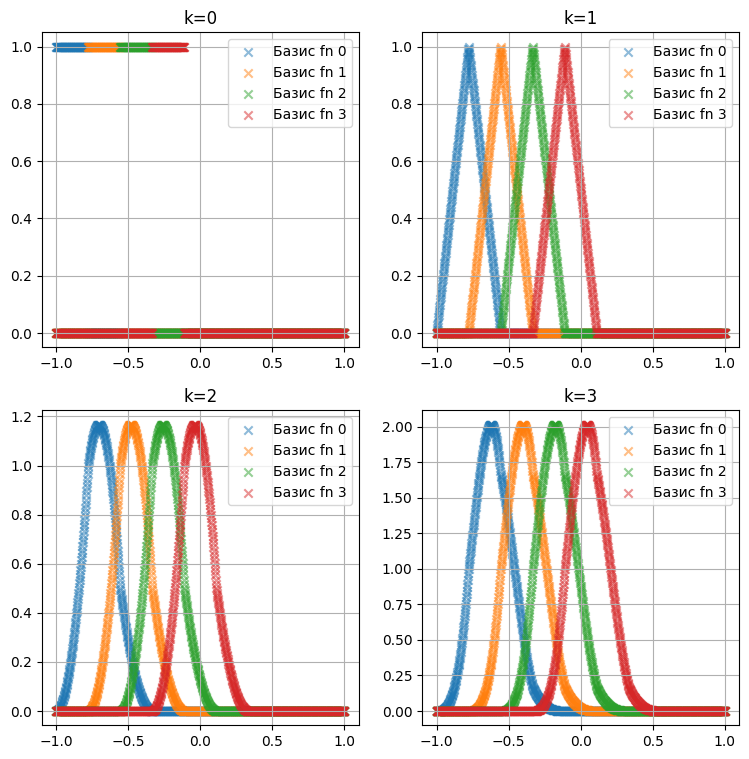

In [78]:
# Создаем 2x2 сетку для графиков
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(9, 9), dpi=100)

# Сколько базисных функций будем отображать
n_basis_to_plot = 4

# Список всех базисов с их метками
all_basis = [(value1, 'k=0'), (value2, 'k=1'), (value3, 'k=2'), (value4, 'k=3')]

# Проходим по каждому порядку сплайна
for i in range(4):
    
    ax = axs[i // 2, i % 2]  # выбираем соответствующую ось на сетке

    value, label = all_basis[i]
    
    # Строим первые n_basis_to_plot базисных функций
    for idx in range(value.shape[-1])[:n_basis_to_plot]:
        ax.scatter(x, value[:, idx], marker='x', label=f"Базис fn {idx}", alpha=0.5)
    
    ax.grid()            # включаем сетку
    ax.set_title(label)  # заголовок с порядком сплайна
    ax.legend()          # легенда для функций

**Что видно из графиков**

- Всего существует $\#control\_points - k - 1$ базисных функций. 
- Каждая базисная функция отлична от нуля в определенном диапазоне, определяемом соответствующими контрольными точками.
- $K = 0$ имеет ступенчатые базисные функции, как и ожидалось для векторов с горячим кодированием.
- $K = 1$ имеет кусочно-линейные базисные функции
- $K \geq 2$ имеет нелинейные базисные функции
- $K=2$ и $K=3$ на первый взгляд выглядят похоже, но при внимательном рассмотрении различия заметны: с ростом порядка функции становятся более гладкими.

Проанализируем, сколько базисных функций одновременно ненулевые в каждой точке области определения.

In [79]:
import collections
# value3 [количество образцов, количество базисных функций]
# проверяем, сколько ненулевых значений для каждого образца

# Для k=2
value3_counts = collections.Counter(torch.where(value3 != 0)[0].tolist())

# Для k=3
value4_counts = collections.Counter(torch.where(value4 != 0)[0].tolist())

# Выводим минимальное и максимальное количество ненулевых функций
print('Минимальное количество ненулевых функций при k=2:', min(value3_counts.values()))
print('Максимальное количество ненулевых функций при k=2:', max(value3_counts.values()))

print('Минимальное количество ненулевых функций при k=3:', min(value4_counts.values()))
print('Максимальное количество ненулевых функций при k=3:', max(value4_counts.values()))

Минимальное количество ненулевых функций при k=2: 1
Максимальное количество ненулевых функций при k=2: 3
Минимальное количество ненулевых функций при k=3: 1
Максимальное количество ненулевых функций при k=3: 4


Результаты показывают, что для k=2 одновременно ненулевыми могут быть от 1 до 3 функций, для k=3 — от 1 до 4. С ростом порядка сплайна увеличивается число ненулевых функций, что делает аппроксимацию более гладкой.

Также, в каждой конкретной точке только небольшое количество базисных функций оказывает влияние - обычно k+1 функций. Это подтверждает свойство локальности: изменение одной контрольной точки влияет только на небольшую часть кривой, а не на всю кривую целиком.

#### Расширение сетки для B-сплайнов

Также можем увидеть расширение сетки с увеличением k. Это связано с тем, что не все входные данные имеют одинаковое количество ненулевых базисных функций. Например, базисные функции вблизи границ входной области часто имеют меньше ненулевых базисных функций. Чтобы решить эту проблему, сетка расширяется, гарантируя, что все объекты во входной области имеют равное количество ненулевых базисных функций.

Сетка расширяется на $k$ контрольных точек с каждой стороны, что позволяет точкам на крайних точках иметь то же количество базисных функций, что и точки в центральной части области.

Расширение сетки можно представить кодом, как показано ниже:

In [80]:
# Изначальная сетка контрольных точек
grid = torch.linspace(-1, 1, steps=5)
print('Старая сетка:', grid, grid.shape)

k = 2  # порядок сплайна
n_intervals = grid.shape[0] - 1  # количество интервалов между узлами
bucket_size = (grid[-1] - grid[0]) / n_intervals  # длина одного интервала

# Расширяем сетку на k контрольных точек с каждой стороны
for i in range(k):
    grid = torch.cat([grid[:1] - bucket_size, grid], dim=0)  # добавляем слева
    grid = torch.cat([grid, grid[-1:] + bucket_size], dim=0)  # добавляем справа

print('Новая сетка:', grid, grid.shape)

Старая сетка: tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000]) torch.Size([5])
Новая сетка: tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000]) torch.Size([9])


На основе кода выше напишем функцию для расширения сетки. Функция extend_grid расширяет сетку на k контрольных точек с каждой стороны, чтобы все точки области имели одинаковое количество ненулевых базисных функций.

In [81]:
def extend_grid(grid, k):
    """
    Расширяет сетку контрольных точек для B-сплайнов на k шагов с каждой стороны.

    Аргументы:
        grid: тензор размерности [количество сплайнов, количество контрольных точек]
        k: порядок сплайна

    Возвращает:
        new_grid: тензор размерности [количество сплайнов, количество контрольных точек + 2*k]
    """
    # Количество интервалов между контрольными точками
    n_intervals = grid.shape[-1] - 1
    # Длина одного интервала
    bucket_size = (grid[:, -1] - grid[:, 0]) / n_intervals
    
    # Расширяем сетку на k контрольных точек с каждой стороны
    for i in range(k):
        grid = torch.cat([grid[:, :1] - bucket_size, grid], dim=-1)  # добавляем слева
        grid = torch.cat([grid, grid[:, -1:] + bucket_size], dim=-1)  # добавляем справа

    return grid

Также, отдельно напишем функцию для вычисления B-сплайн базисных функций. Функция eval_basis_functions вычисляет значения B-сплайн базисных функций для любых точек и заданного порядка. Сначала используется расширенная сетка, затем рекуррентно строятся функции от базового случая (k=0) до нужного порядка. Результатом является матрица значений функций, пригодная для аппроксимации и построения сплайнов.

In [82]:
def eval_basis_functions(x_eval, grid, k):
    """
    Вычисляет базисные B-сплайны для заданных точек x, сетки контрольных точек и порядка сплайна k.

    Аргументы:
        x_eval: тензор точек для вычисления [количество точек, количество измерений]
        grid: тензор контрольных точек [количество сплайнов, количество контрольных точек]
        k: порядок сплайна (0, 1, 2, 3 ...)

    Возвращает:
        bases: тензор значений базисных функций [количество точек, количество сплайнов, количество базисных функций]
    """

    # Расширяем сетку для корректной работы на краях
    grid_ = extend_grid(grid, k)

    # Изменяем форму для совместимости размеров
    grid_ = grid_.unsqueeze(dim=2)  # [сплайны, узлы, 1]
    x_ = x_eval.unsqueeze(dim=1)    # [точки, 1, измерения]

    # Построение базисных функций по рекуррентной формуле
    for idx in range(k+1):
        if idx == 0:
            # Базовый случай k=0: кусочно-постоянные функции
            bases = (x_ >= grid_[:, :-1]) * (x_ < grid_[:, 1:]) * 1.0
        else:
            # Рекуррентное вычисление для k>0
            bases1 = (x_ - grid_[:, :-(idx+1)]) / (grid_[:, 1:-idx] - grid_[:, :-(idx+1)]) * bases[:, :-1]
            bases2 = (grid_[:, (idx+1):] - x_) / (grid_[:, (idx+1):] - grid_[:, 1:-idx]) * bases[:, 1:]
            bases = bases1 + bases2

    # Транспонируем для удобного формата [точки, сплайны, базисные функции]
    return bases.transpose(1, 2) * 1.0

А теперь повторим эксперимент, но с применением расширения сетки:

Сетка: Размер:torch.Size([10]), значения: tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
x: Размер:torch.Size([1000]), значения: tensor([-1.0000, -0.9980, -0.9960, -0.9940, -0.9920])
k=0, количество базисных функций: 9
k=1, количество базисных функций: 10
k=2, количество базисных функций: 11
k=3, количество базисных функций: 12


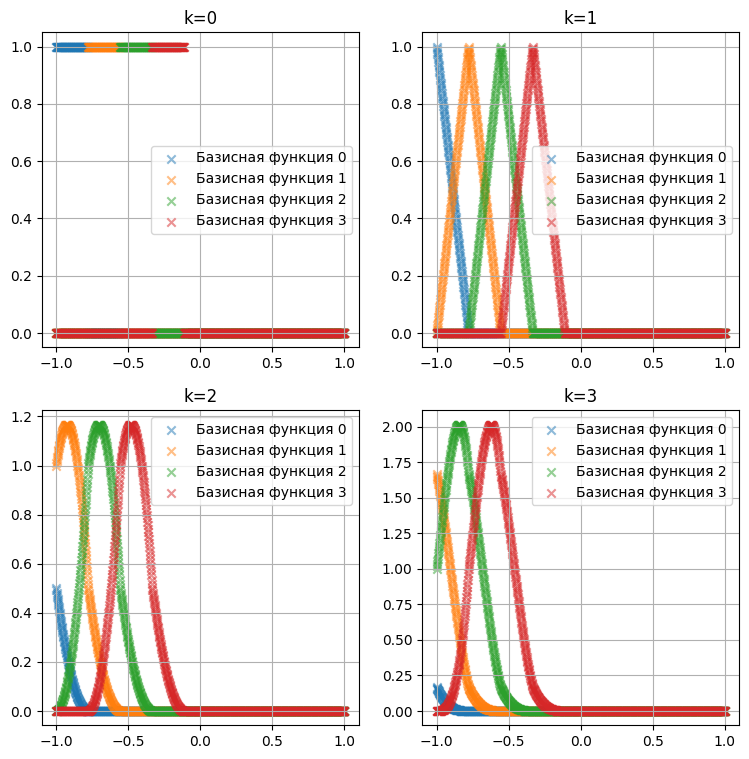

In [83]:
# Создаем исходную сетку контрольных точек и точки для вычисления базисов
grid = torch.linspace(-1, 1, steps=10)
x = torch.linspace(-1, 1, steps=1000)  # область для построения графика

print(f"Сетка: Размер:{grid.shape}, значения:", grid)
print(f"x: Размер:{x.shape}, значения:", x[:5])

# Изменяем форму для возможности сравнения каждого x с каждой контрольной точкой
grid_ = grid.unsqueeze(dim=0)  # добавляем измерение для batch
x_ = x.unsqueeze(dim=1)        # добавляем измерение для features

# Вычисляем базисные функции для разных порядков сплайнов с расширенной сеткой
value1 = eval_basis_functions(x_, grid_, k=0)  # k=0 — ступенчатые
value2 = eval_basis_functions(x_, grid_, k=1)  # k=1 — линейные
value3 = eval_basis_functions(x_, grid_, k=2)  # k=2 — квадратичные
value4 = eval_basis_functions(x_, grid_, k=3)  # k=3 — кубические

# Выводим количество базисных функций для каждого порядка
print(f"k=0, количество базисных функций: {value1.shape[-1]}")
print(f"k=1, количество базисных функций: {value2.shape[-1]}")
print(f"k=2, количество базисных функций: {value3.shape[-1]}")
print(f"k=3, количество базисных функций: {value4.shape[-1]}")

# Визуализация первых нескольких базисных функций каждого порядка
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(9, 9), dpi=100)
n_basis_to_plot = 4  # количество базисных функций для отображения
all_basis = [(value1, 'k=0'), (value2, 'k=1'), (value3, 'k=2'), (value4, 'k=3')]

for i in range(4):
    ax = axs[i // 2, i % 2]  # позиция subplot
    value, label = all_basis[i]
    
    for idx in range(value.shape[-1])[:n_basis_to_plot]:
        ax.scatter(x, value[:, 0, idx], marker='x', label=f"Базисная функция {idx}", alpha=0.5)
    
    ax.grid()
    ax.set_title(label)
    ax.legend()

Теперь мы видим, что даже граничные точки получают одинаковое количество ненулевых базисных функций. Тем самым, решилась проблема неравномерного поведения на краях, наблюдаемую в предыдущем эксперименте.

### Функции активации (коэффициенты)

#### Изучение функции активации, т.е. коэффициентов

Базисные функции можно использовать для построения любой желаемой функции, если правильно подобрать коэффициенты (веса) для каждой базисной функции.

Математически это выглядит так: мы берём сумму всех базисных функций, умноженных на свои коэффициенты, и хотим, чтобы эта сумма максимально точно приближала целевую функцию. В нашем примере целевая функция - sin(πx).

Так как базисные функции можно вычислить для любого x, задача сводится к решению простой линейной системы уравнений: найти такие коэффициенты, чтобы разница между построенной функцией и целевой была минимальной. Для этого удобно использовать метод наименьших квадратов, который эффективно решает такие задачи.

Формально мы определяем $ f(x) = \sum_{i=0}^{n} c_i \cdot N_{i, k}(x) = \sum_{i=0}^{n} c_i \cdot N_i(x) $.



Учитывая $x$, мы вычислим $N_i(x)$ детерминированно. Поскольку у нас уже есть предопределенный $ f(x) $, это представляет собой простую модель линейных уравнений для решения этих уравнений: $ \min_{\mathbf{c}} |\mathbf{Nc} - f(x)| $. Воспользуемся функцией torch.linalg.lstsq для решения $\mathbf{c} $.

In [84]:
# определение целевой функции, которую нам нужно сопоставить
fn = lambda x: torch.sin(torch.pi * x)  # цельевая функция: sin(πx)
# метод наименьших квадратов для решения линейной системы
coeff1 = torch.linalg.lstsq(value1.squeeze(1), fn(x)) # вектор коэффициентов для базисных функций k=0

linalg.lstsq возвращает объект (namedtuple), содержащий, как правило, решение (коэффициенты 
c
c), остатки (residuals), ранг и сингулярные числа. Самые важные - это поле solution (или первый элемент результата), где лежат найденные коэффициенты. Используем его, чтобы получить вектор коэффициентов, минимизирующих ошибку аппроксимации целевой функции sin(πx) базисными функциями k=0.

In [85]:
# вектор коэффициентов для базисных функций k=0
coeff1 # нужно использовать решение из этого объекта.

torch.return_types.linalg_lstsq(
solution=tensor([-0.3322, -0.8470, -0.9655, -0.6322, -0.0031,  0.6275,  0.9644,  0.8501,
         0.3380]),
residuals=tensor([]),
rank=tensor(9),
singular_values=tensor([]))

Теперь, соединяем базисные функции и коэффициенты, получив аппроксимацию sin(πx) с помощью B-сплайнов k=0.

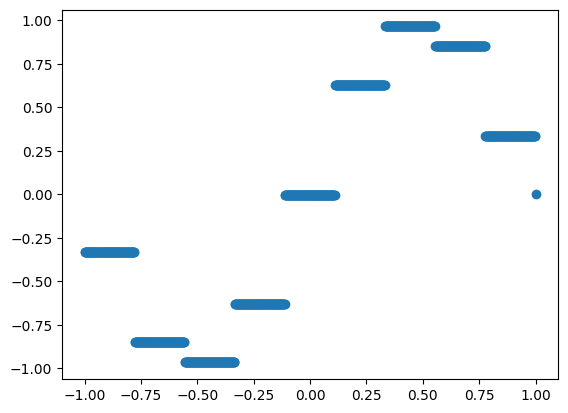

In [86]:
fn = lambda x: torch.sin(torch.pi * x)  # целевая функция
coeff1 = torch.linalg.lstsq(value1.squeeze(1), fn(x)).solution  # нахождение коэффициентов

# прогноз: линейная комбинация базисных функций с найденными коэффициентами
y_pred = torch.einsum('i, ji -> j', coeff1, value1.squeeze(1))
plt.scatter(x, y_pred)

#### Влияние $k$ на точность обучения
Рассмотрим две функции — 
1. $\sin(\pi \times x)$
2. $\sin(\pi \times e^{x})$

И четыре значения $k \in \{0, 1, 2, 3\}$.

**Случай 1:** Когда мы не расширяем сетку

Для вычисления функций определена сетка из 20 контрольных точек и 1000 точек для аппроксимации.  Затем вручную рассчитываются базисные функции всех четырех порядков, используя рекурсивную формулу Кокса-де Бура. Для каждого порядка выполняется задача наименьших квадратов для оптимизации коэффициентов и результаты визуализируются в виде графика сравнения целевой функции и её аппроксимации.

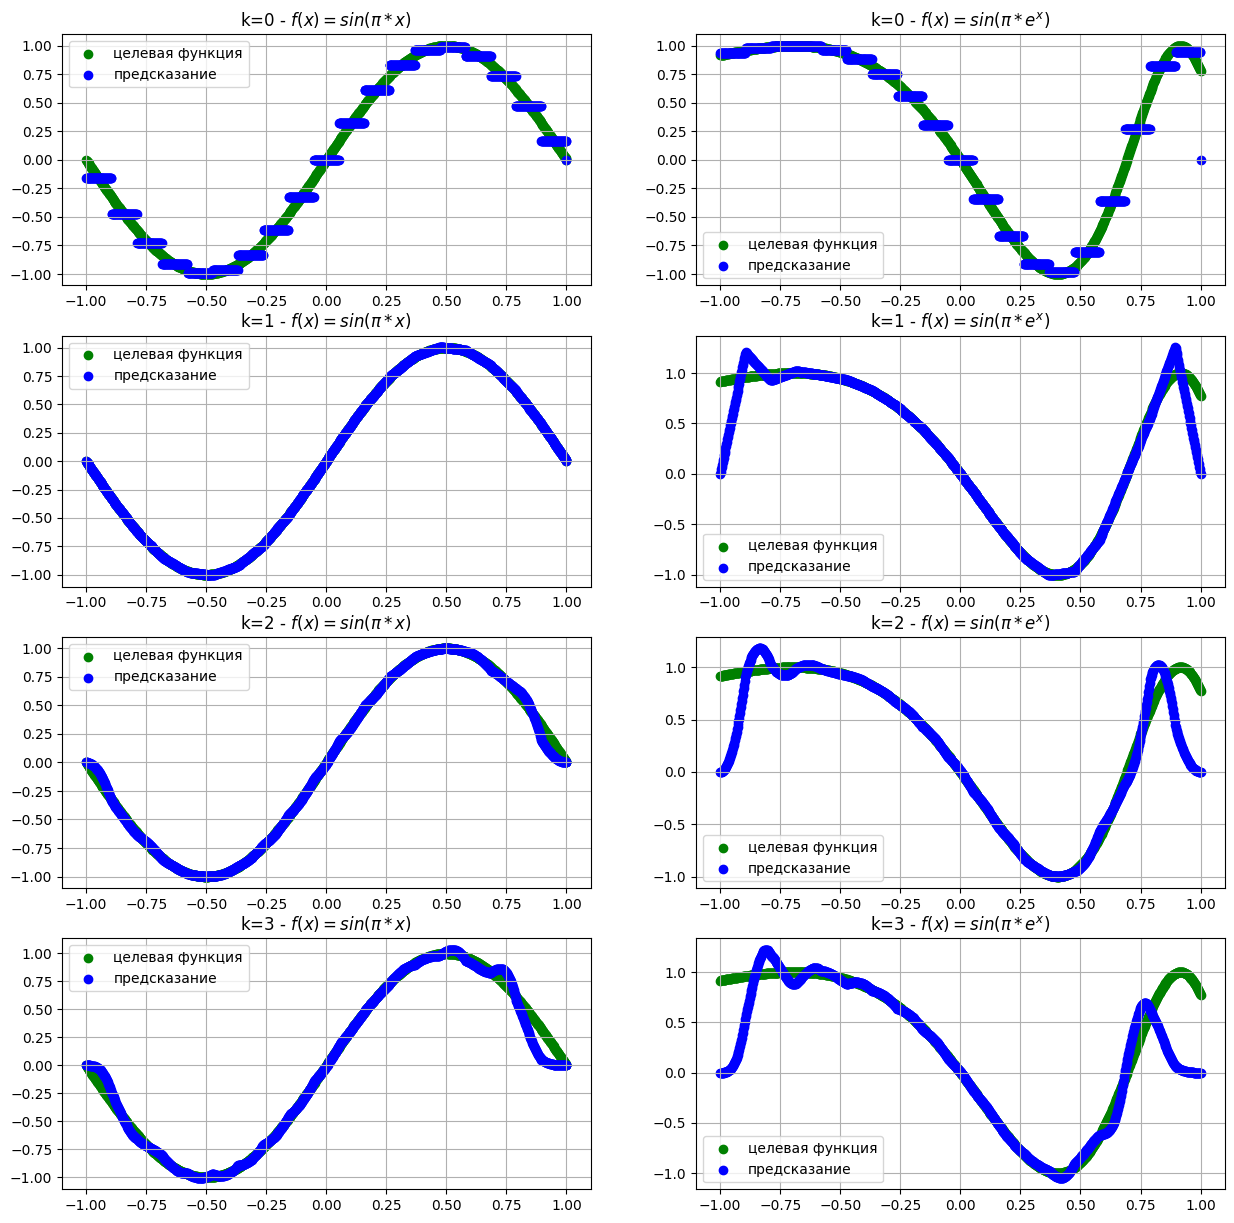

In [87]:
# замечаем увеличение точек сетки до 20
grid = torch.linspace(-1, 1, steps=20) 
x = torch.linspace(-1, 1, steps=1000) # берем всю область для построения графика базисной функции

# Изменяем форму для сравнения каждого x с каждой контрольной точкой
grid_ = grid.unsqueeze(dim=0)
x_ = x.unsqueeze(dim=1)

# Базисные функции для порядка 0
k = 0
value1 = (x_ >= grid_[:,:-1]) * (x_ < grid_[:, 1:])

# Базисные функции для порядка 1
k = 1
value21 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value1[:, :-1]
value22 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value1[:, 1:]
value2 = value21 + value22

# Базисные функции для порядка 2
k = 2
value31 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value2[:, :-1]
value32 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value2[:, 1:]
value3 = value31 + value32

# Базисные функции для порядка 3
k = 3
value41 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value3[:, :-1]
value42 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value3[:, 1:]
value4 = value41 + value42

# Определяем целевые функции для аппроксимации
fns = []
fns += [(lambda x: torch.sin(torch.pi * x), '$f(x) = sin(\\pi*x)$')]
fns += [(lambda x: torch.sin(torch.pi * torch.exp(x)), '$f(x) = sin(\\pi*e^{x})$')]

# Список всех базисных функций по порядкам
all_basis = [(value1 * 1.0, 'k=0'), (value2, 'k=1'), (value3, 'k=2'), (value4, 'k=3')]

# Создаем сетку графиков для визуализации
fig, axs = plt.subplots(ncols=len(fns), nrows=len(all_basis), figsize=(15, 15), dpi=100)

# Для каждой комбинации порядка и функции строим график
for i in range(len(all_basis)):
    for j in range(len(fns)):
    
        ax = axs[i, j] 
        value, label = all_basis[i]
        fn, fn_label = fns[j]
        
        # Находим коэффициенты методом наименьших квадратов
        coeff = torch.linalg.lstsq(value, fn(x)).solution
        # Вычисляем предсказанные значения
        y_pred = torch.einsum('i, ji -> j', coeff, value)
        
        # Визуализируем целевую функцию и предсказание
        ax.scatter(x, fn(x), color='green', label='целевая функция')
        ax.scatter(x, y_pred, color='blue', label="предсказание")

        ax.grid()
        ax.set_title(f"{label} - {fn_label}")
        ax.legend()

**Наблюдения**

1. По мере увеличения $k$ соответствие вблизи границ не является идеальным из-за граничных эффектов, как обсуждалось ранее. На этих территориях недостаточно пограничных точек. Эту проблему можно свести к минимуму, увеличив количество контрольных точек, о чем мы поговорим дальше.
2. По мере увеличения $k$ соответствие значительно улучшается в середине области.

**Случай 2:** Когда мы расширяем сетку в обе стороны

Повторим эксперимент с теми же функциями, но расширив сетку.

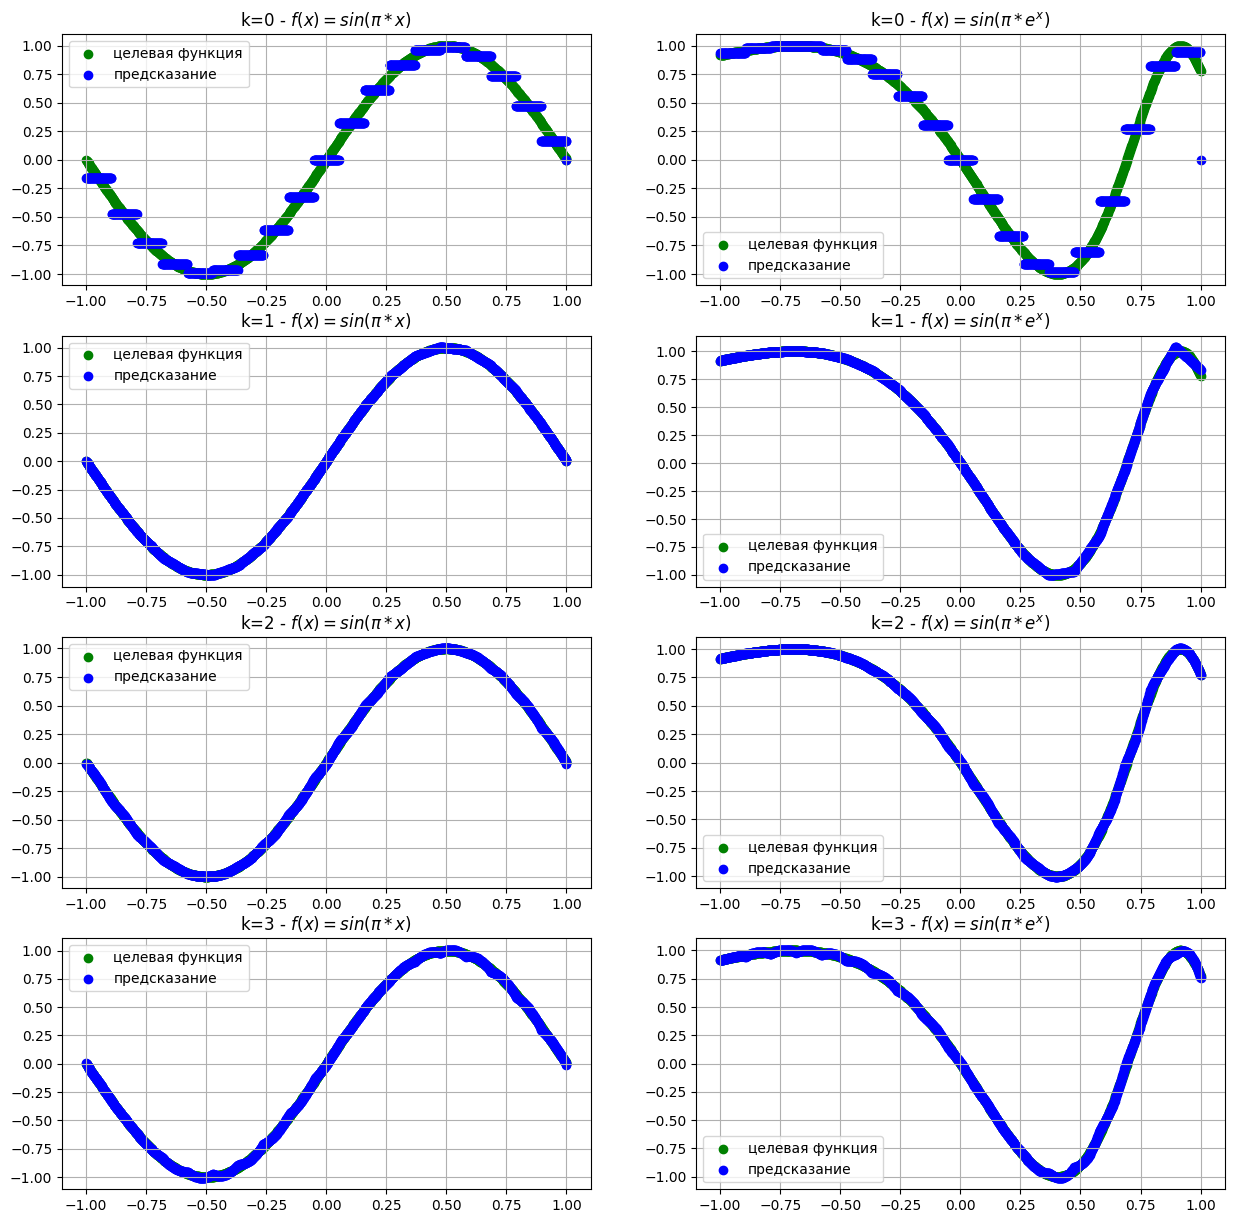

In [88]:
# Определяем целевые функции для аппроксимации
fns = []
fns += [(lambda x: torch.sin(torch.pi * x), '$f(x) = sin(\\pi*x)$')]
fns += [(lambda x: torch.sin(torch.pi * torch.exp(x)), '$f(x) = sin(\\pi*e^{x})$')]

# Вычисляем базисные функции с расширенной сеткой для всех порядков
all_basis = [
        (eval_basis_functions(x_, grid_, k=0), 'k=0'), 
        (eval_basis_functions(x_, grid_, k=1), 'k=1'), 
        (eval_basis_functions(x_, grid_, k=2), 'k=2'), 
        (eval_basis_functions(x_, grid_, k=3), 'k=3')
]

# Создаем сетку графиков для визуализации результатов
fig, axs = plt.subplots(ncols=len(fns), nrows=len(all_basis), figsize=(15, 15), dpi=100)

# Для каждой комбинации порядка сплайна и целевой функции
for i in range(len(all_basis)):
    for j in range(len(fns)):
    
        ax = axs[i, j] 
        value, label = all_basis[i]
        fn, fn_label = fns[j]
        
        # Находим оптимальные коэффициенты методом наименьших квадратов
        coeff = torch.linalg.lstsq(value.squeeze(1), fn(x)).solution
        # Вычисляем предсказанные значения используя найденные коэффициенты
        y_pred = torch.einsum('i, ji -> j', coeff, value.squeeze(1))
        
        # Визуализируем целевую функцию и предсказание
        ax.scatter(x, fn(x), color='green', label='целевая функция')
        ax.scatter(x, y_pred, color='blue', label="предсказание")

        ax.grid()
        ax.set_title(f"{label} - {fn_label}")
        ax.legend()

Можно заметить, что увеличение количества контрольных точек улучшило общее соответствие границ.

**Случай 3:** Обычно реальные данные неясны. Как будет выглядеть шум при аппроксимации функции?


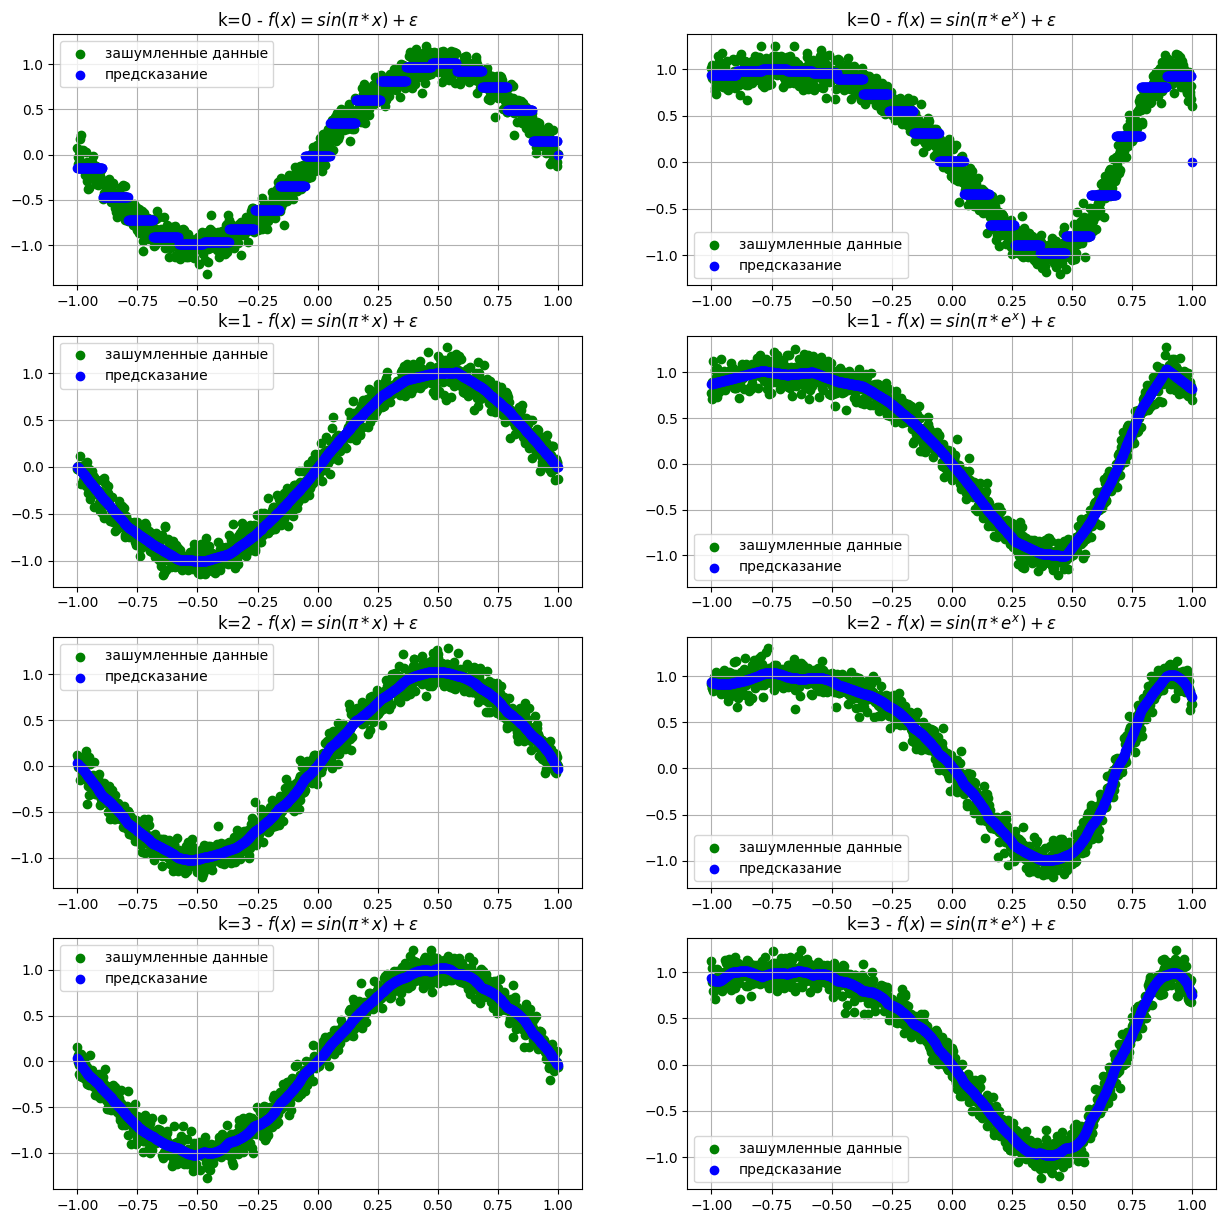

In [89]:
# Определяем зашумленные целевые функции
fns = []
fns += [
    (
        lambda x: torch.sin(torch.pi * x) + 0.1 * torch.randn(x.shape),
        "$f(x) = sin(\\pi*x) + \\epsilon$",
    )
]
fns += [
    (
        lambda x: torch.sin(torch.pi * torch.exp(x)) + 0.1 * torch.randn(x.shape),
        "$f(x) = sin(\\pi*e^{x}) + \\epsilon$",
    )
]

# Вычисляем базисные функции с расширенной сеткой для всех порядков
all_basis = [
    (eval_basis_functions(x_, grid_, k=0), "k=0"),
    (eval_basis_functions(x_, grid_, k=1), "k=1"),
    (eval_basis_functions(x_, grid_, k=2), "k=2"),
    (eval_basis_functions(x_, grid_, k=3), "k=3"),
]

# Создаем сетку графиков для визуализации
fig, axs = plt.subplots(ncols=len(fns), nrows=len(all_basis), figsize=(15, 15), dpi=100)

# Для каждой комбинации порядка сплайна и зашумленной функции
for i in range(len(all_basis)):
    for j in range(len(fns)):
        ax = axs[i, j]
        value, label = all_basis[i]
        fn, fn_label = fns[j]

        # Генерируем зашумленные целевые значения
        y_target = fn(x)
        # Находим коэффициенты методом наименьших квадратов
        coeff = torch.linalg.lstsq(value.squeeze(1), y_target).solution
        # Вычисляем предсказанные значения
        y_pred = torch.einsum("i, ji -> j", coeff, value.squeeze(1))

        # Визуализируем зашумленные данные и предсказание
        ax.scatter(x, y_target, color="green", label="зашумленные данные")
        ax.scatter(x, y_pred, color="blue", label="предсказание")

        ax.grid()
        ax.set_title(f"{label} - {fn_label}")
        ax.legend()

По мере увеличения порядка базисных функций, аппроксимация становится более гладкой и точной, а влияние шума уменьшается.

#### **Вывод**

В ходе работы изучены принципы построения B-сплайнов, включая определение их параметров по контрольным точкам и порядку сплайнов. Исследованы возможности использования B-сплайнов для аппроксимации произвольных функций активации. А также, увидели влияние выбора контрольных точек и порядка сплайнов на точность подбора функции, подтверждая важность этих параметров для достижения оптимальной аппроксимации.

